# Phase 1

## Imports

In [1]:
from real_data import RealData
from localize import Localize
from accuracy import Accuracy

from IPython.display import Image, display

import cv2

## Obtaining the training images data from the "train" json file

In [2]:
training_images = RealData().read_images_from_json(file_name='training.json')

# Images Output 

## Red Boundary Boxes -> Real Boundary Boxes

## Blue Boundary Boxes -> Predicted Boundary Boxes

Harsh accuracy for localization: 23.714480693753856
max, min 199 52
max, min height 199 52


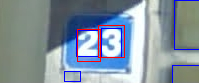

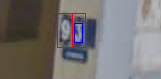

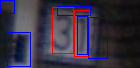

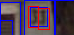

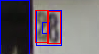

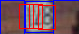

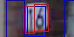

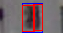

In [3]:
# number_of_images -> number of images to be displayed

number_of_images = 10 # change this to obtain the desired number of images (max. 33,402 images)

result = Localize().localize_digits(images=training_images, number_of_images=number_of_images, show_images=False)

images = result.images

for i in range( 1, number_of_images + 1 ):
    OutImg = cv2.imencode('.png', images[i].data)[1]
    display(Image(OutImg))

## Calcuating the Accuracy

In [4]:
accuracy = result.accuracy

harsh_accuracy = sum(accuracy) / len(accuracy)

print("Harsh accuracy", str(round(harsh_accuracy, 2)) + '%')
print('\n')

for i in range( number_of_images ):
    Accuracy().bb_intersection_over_union(images[i].predicted_bbox, images[i].real_bboxes)

    non_harsh_accuracy = Accuracy().bb_intersection_over_union(images[i].predicted_bbox, images[i].real_bboxes)

    print('Image #' +  str(i+1) + " Non-Harsh accuracy: " + str(round(non_harsh_accuracy * 100, 2)) + '%')
    print('\n')

Harsh accuracy 23.71%


Image #1 Non-Harsh accuracy: 0.0%


Image #2 Non-Harsh accuracy: 89.97%


Image #3 Non-Harsh accuracy: 56.02%


Image #4 Non-Harsh accuracy: 53.6%


Image #5 Non-Harsh accuracy: 55.46%


Image #6 Non-Harsh accuracy: 74.78%


Image #7 Non-Harsh accuracy: 73.93%


Image #8 Non-Harsh accuracy: 81.65%


Image #9 Non-Harsh accuracy: 43.08%


Image #10 Non-Harsh accuracy: 63.07%




# Phase 2

## Imports

In [5]:
from recognize import Recognize

## Obtaining the training images data from the "train" json file

In [6]:
training_images = RealData().read_images_from_json(file_name='training.json')

# Images Output (Feature Matching)

Number of Matched Images: 168


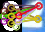

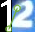

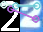

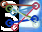

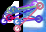

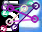

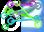

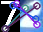

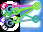

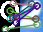

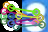

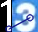

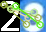

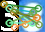

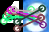

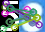

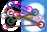

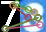

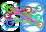

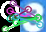

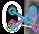

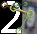

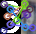

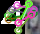

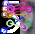

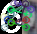

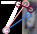

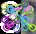

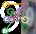

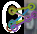

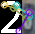

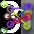

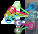

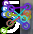

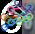

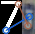

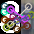

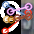

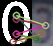

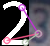

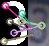

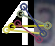

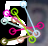

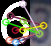

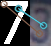

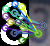

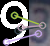

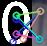

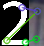

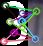

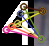

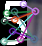

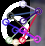

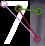

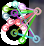

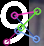

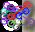

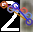

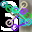

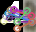

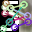

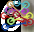

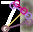

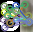

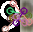

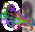

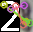

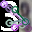

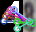

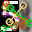

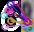

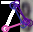

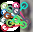

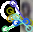

In [10]:
# number_of_images -> number of images to be displayed

number_of_images = 10 # change this to obtain the desired number of images (max. 33,402 images)
    
result = Recognize().test_images(images=training_images, number_of_images=number_of_images)

images = result.images

print("Number of Matched Images:", len(images))

for image in images:
    OutImg = cv2.imencode('.png', image)[1]
    display(Image(OutImg))

## Calcuating the Accuracy

In [11]:
accuracy = result.accuracy

print("Number recognition accuracy:", accuracy)

Number recognition accuracy: 4.545454545454546
